# Deviance of both methods

# Chunks of code that calculate arrays of the X and Y positions of the three body problem with Runge-Kutta and Euler's method respectively

In [112]:
import numpy as np
from scipy.integrate import solve_ivp

# Fixed values for gravitational constant and masses
G = 1.0
m1, m2, m3 = 1.0, 1.0, 1.0

def three_body_eq(t, y, G, m1, m2, m3):
    x1, y1, x2, y2, x3, y3 = y[0:6]
    vx1, vy1, vx2, vy2, vx3, vy3 = y[6:12]
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    
    ax1 = G * m2 * (x2 - x1) / r12**3 + G * m3 * (x3 - x1) / r13**3
    ay1 = G * m2 * (y2 - y1) / r12**3 + G * m3 * (y3 - y1) / r13**3
    
    ax2 = G * m1 * (x1 - x2) / r12**3 + G * m3 * (x3 - x2) / r23**3
    ay2 = G * m1 * (y1 - y2) / r12**3 + G * m3 * (y3 - y2) / r23**3
    
    ax3 = G * m1 * (x1 - x3) / r13**3 + G * m2 * (x2 - x3) / r23**3
    ay3 = G * m1 * (y1 - y3) / r13**3 + G * m2 * (y2 - y3) / r23**3
    
    return [vx1, vy1, vx2, vy2, vx3, vy3, ax1, ay1, ax2, ay2, ax3, ay3]

def compute_positions(dt, iterations):
    # Initial conditions for the three bodies
    x1, y1 = 0.970, 0.243
    x2, y2 = -0.970, -0.243
    x3, y3 = 0.0, 0.0
    vx1, vy1 = 0.466, -0.432
    vx2, vy2 = 0.466, -0.432
    vx3, vy3 = -2 * 0.466, 2 * 0.432
    y0 = [x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3]

    # Solve the three-body problem using Runge-Kutta (via solve_ivp)
    t_span = (0, dt * iterations)  # Total simulation time
    t_eval = np.linspace(*t_span, iterations)  # Time steps for evaluation
    solution = solve_ivp(three_body_eq, t_span, y0, args=(G, m1, m2, m3), t_eval=t_eval, rtol=1e-9)

    # Extract positions from Runge-Kutta solution
    x1_sol, y1_sol = solution.y[0], solution.y[1]
    x2_sol, y2_sol = solution.y[2], solution.y[3]
    x3_sol, y3_sol = solution.y[4], solution.y[5]

    # Combine positions into arrays
    planet1_positions = np.column_stack((x1_sol, y1_sol))
    planet2_positions = np.column_stack((x2_sol, y2_sol))
    planet3_positions = np.column_stack((x3_sol, y3_sol))

    return planet1_positions, planet2_positions, planet3_positions

# Parameters for the simulation
dt = 0.05
iterations = 1000

# Compute positions
rk1, rk2, rk3 = compute_positions(dt, iterations)

# Output the results


In [111]:
import numpy as np

# Fixed values for gravitational constant and masses
G = 1.0

class Planet:
    def __init__(self, mass, pos, radius=0.1, v=[0, 0]):
        self.mass = mass
        self.pos = np.array(pos, dtype=float)
        self.v = np.array(v, dtype=float)
        self.radius = radius

def gravity_acceleration(planet1, planet2):
    d = planet2.pos - planet1.pos
    r = np.linalg.norm(d)
    if r <= (planet1.radius + planet2.radius):
        raise ValueError('Collision has occurred!')
    magnitude = (G * planet1.mass * planet2.mass) / r**2
    vector = magnitude * d / r
    a = vector / planet1.mass
    return a

def euler_method(planet1, planet2, planet3, dt, iterations):
    # Initialize arrays to store positions of the planets
    planet1_positions = []
    planet2_positions = []
    planet3_positions = []

    # Run the simulation loop
    for _ in range(iterations):
        # Calculate accelerations due to gravity
        a12 = gravity_acceleration(planet1, planet2)
        a21 = gravity_acceleration(planet2, planet1)
        a13 = gravity_acceleration(planet1, planet3)
        a31 = gravity_acceleration(planet3, planet1)
        a23 = gravity_acceleration(planet2, planet3)
        a32 = gravity_acceleration(planet3, planet2)

        # Update velocities using Euler's method
        planet1.v += (a12 + a13) * dt
        planet2.v += (a21 + a23) * dt
        planet3.v += (a31 + a32) * dt

        # Update positions using Euler's method
        planet1.pos += planet1.v * dt
        planet2.pos += planet2.v * dt
        planet3.pos += planet3.v * dt

        # Store positions into the arrays
        planet1_positions.append(planet1.pos.copy())
        planet2_positions.append(planet2.pos.copy())
        planet3_positions.append(planet3.pos.copy())

    # Convert the position lists to numpy arrays for easier manipulation
    return np.array(planet1_positions), np.array(planet2_positions), np.array(planet3_positions)

# Initialize planets with initial conditions
sun = Planet(1, (0.970, 0.243), radius=0.1, v=[0.466, -0.4320])
mars = Planet(1, (-0.970, -0.243), radius=0.1, v=[0.466, -0.432])
moon = Planet(1, (0.0, 0.0), radius=0.1, v=[-2 * 0.466, 2 * 0.432])

# Run Euler's method for 300 iterations with a time step of 0.05
e1, e2, e3 = euler_method(sun, mars, moon, 0.05, 1000)



## The following chunks will be different graphs showing visual differences (or in some cases similarities) of each body and each method

Text(0, 0.5, 'Y Position')

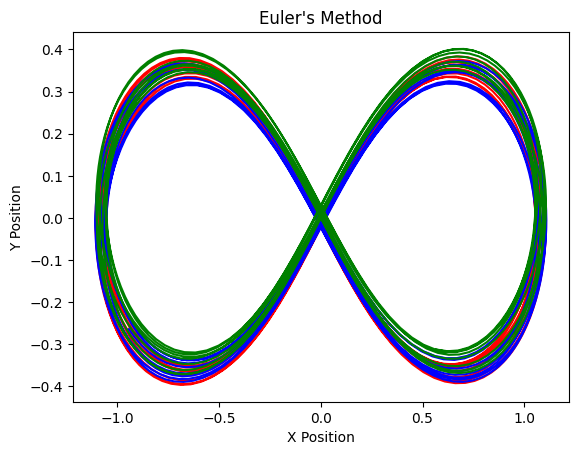

In [113]:
plt.plot(e1[0:,0],e1[0:,1], color = "r")
plt.plot(e2[0:,0],e2[0:,1], color = "b")
plt.plot(e3[0:,0],e3[0:,1], color = "g")
plt.title("Euler's Method")
plt.xlabel("X Position")
plt.ylabel("Y Position")

Text(0, 0.5, 'Y Position')

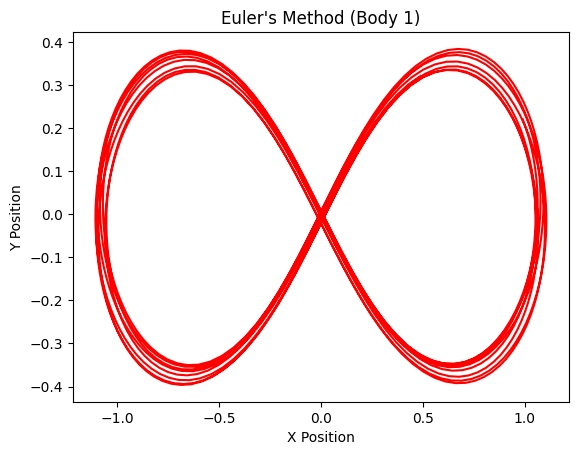

In [114]:
plt.plot(e1[0:,0],e1[0:,1], color = "r")
plt.title("Euler's Method (Body 1)")
plt.xlabel("X Position")
plt.ylabel("Y Position")

Text(0, 0.5, 'Y Position')

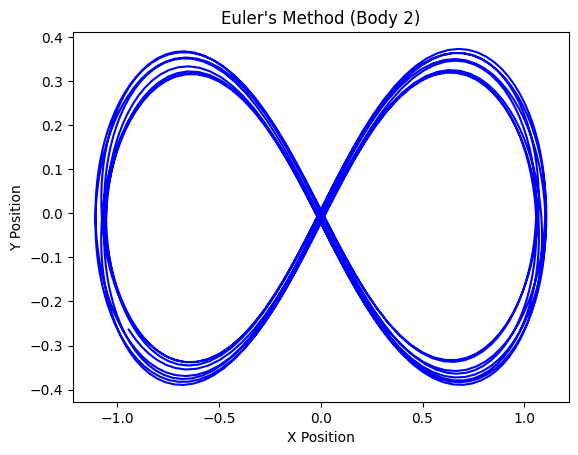

In [115]:
plt.plot(e2[0:,0],e2[0:,1], color = "b")
plt.title("Euler's Method (Body 2)")
plt.xlabel("X Position")
plt.ylabel("Y Position")

Text(0, 0.5, 'Y Position')

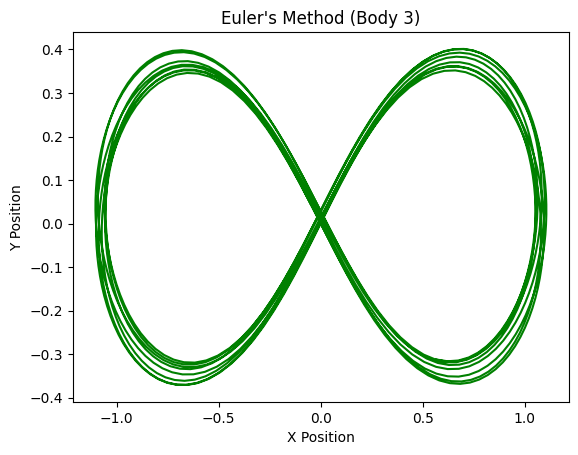

In [116]:
plt.plot(e3[0:,0],e3[0:,1], color = "g")
plt.title("Euler's Method (Body 3)")
plt.xlabel("X Position")
plt.ylabel("Y Position")

Text(0, 0.5, 'Y Position')

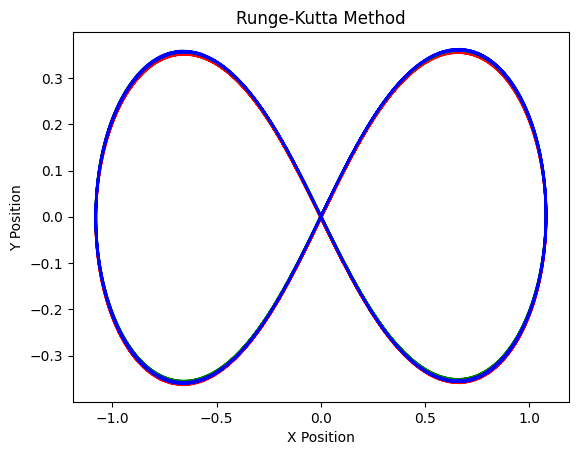

In [117]:
plt.plot(rk1[0:,0],rk1[0:,1], color = "r")
plt.plot(rk2[0:,0],rk2[0:,1], color = "g")
plt.plot(rk3[0:,0],rk3[0:,1], color = "b")
plt.title("Runge-Kutta Method")
plt.xlabel("X Position")
plt.ylabel("Y Position")

Text(0, 0.5, 'Y Position')

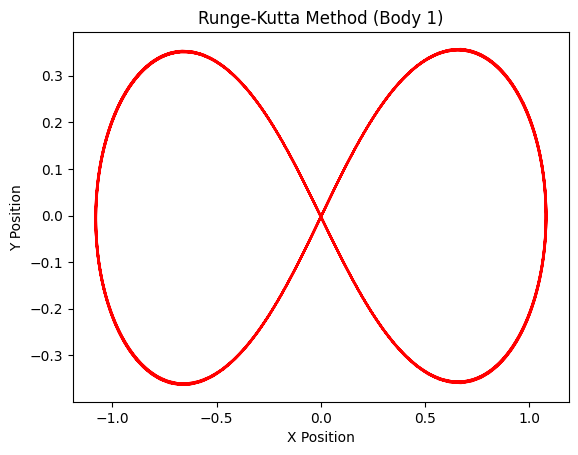

In [118]:
plt.plot(rk1[0:,0],rk1[0:,1], color = "r")
plt.title("Runge-Kutta Method (Body 1)")
plt.xlabel("X Position")
plt.ylabel("Y Position")

Text(0, 0.5, 'Y Position')

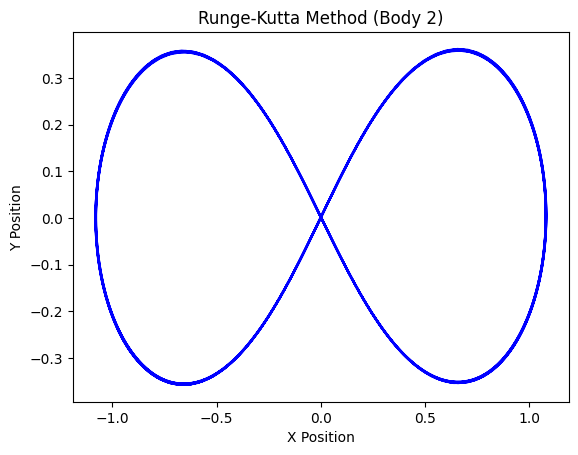

In [119]:
plt.plot(rk2[0:,0],rk2[0:,1], color = "b")
plt.title("Runge-Kutta Method (Body 2)")
plt.xlabel("X Position")
plt.ylabel("Y Position")

Text(0, 0.5, 'Y Position')

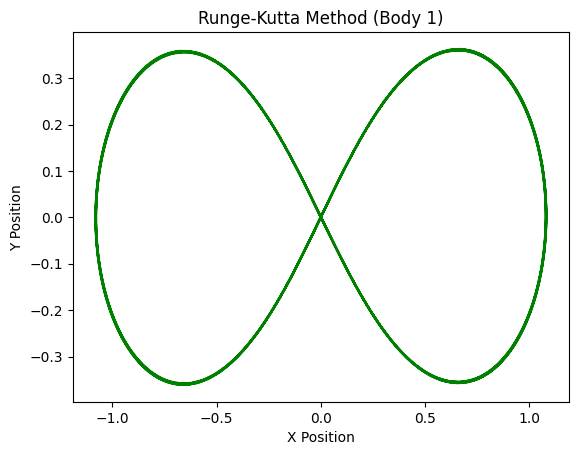

In [120]:
plt.plot(rk3[0:,0],rk3[0:,1], color = "g")
plt.title("Runge-Kutta Method (Body 1)")
plt.xlabel("X Position")
plt.ylabel("Y Position")

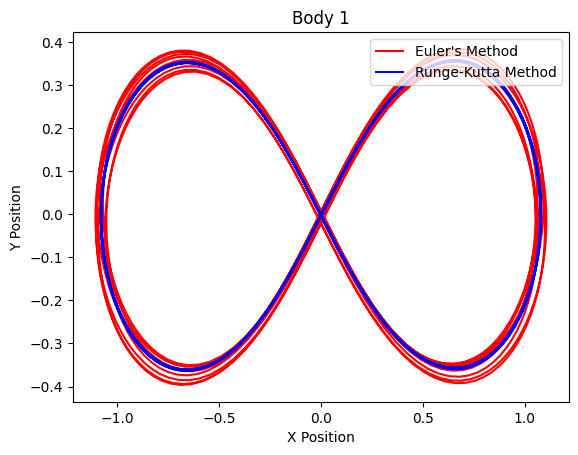

In [121]:
df1 = e1 - rk1
plt.plot(e1[0:,0],e1[0:,1], color = "r", label = "Euler's Method")
plt.plot(rk1[0:,0],rk1[0:,1], color = "b", label = "Runge-Kutta Method")
plt.title("Body 1")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc = 1)

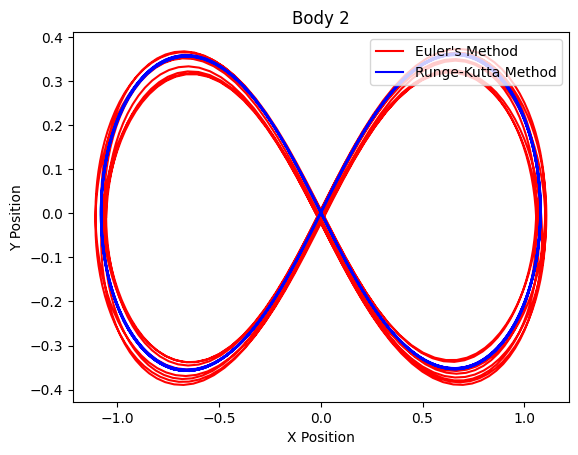

In [122]:
df2 = e2 - rk2
plt.plot(e2[0:,0],e2[0:,1], color = "r", label = "Euler's Method")
plt.plot(rk2[0:,0],rk2[0:,1], color = "b", label = "Runge-Kutta Method")
plt.title("Body 2")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc = 1)

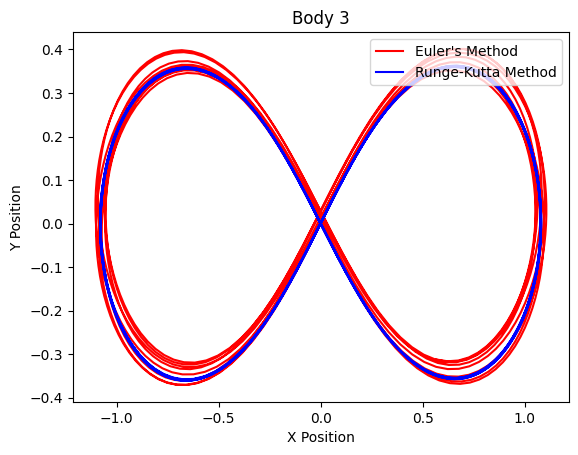

In [123]:
df3 = e3 - rk3
plt.plot(e3[0:,0],e3[0:,1], color = "r", label = "Euler's Method")
plt.plot(rk3[0:,0],rk3[0:,1], color = "b", label = "Runge-Kutta Method")
plt.title("Body 3")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc = 1)

### Comparing the x and y positions of each body of each method

In [124]:
e1x = e1[0:,0]
e1y = e1[0:,1]
e2x = e2[0:,0]
e2y = e2[0:,1]
e3x = e3[0:,0]
e3y = e3[0:,1]
rk1x = rk1[0:,0]
rk1y = rk1[0:,1]
rk2x = rk2[0:,0]
rk2y = rk2[0:,1]
rk3x = rk3[0:,0]
rk3y = rk3[0:,1]

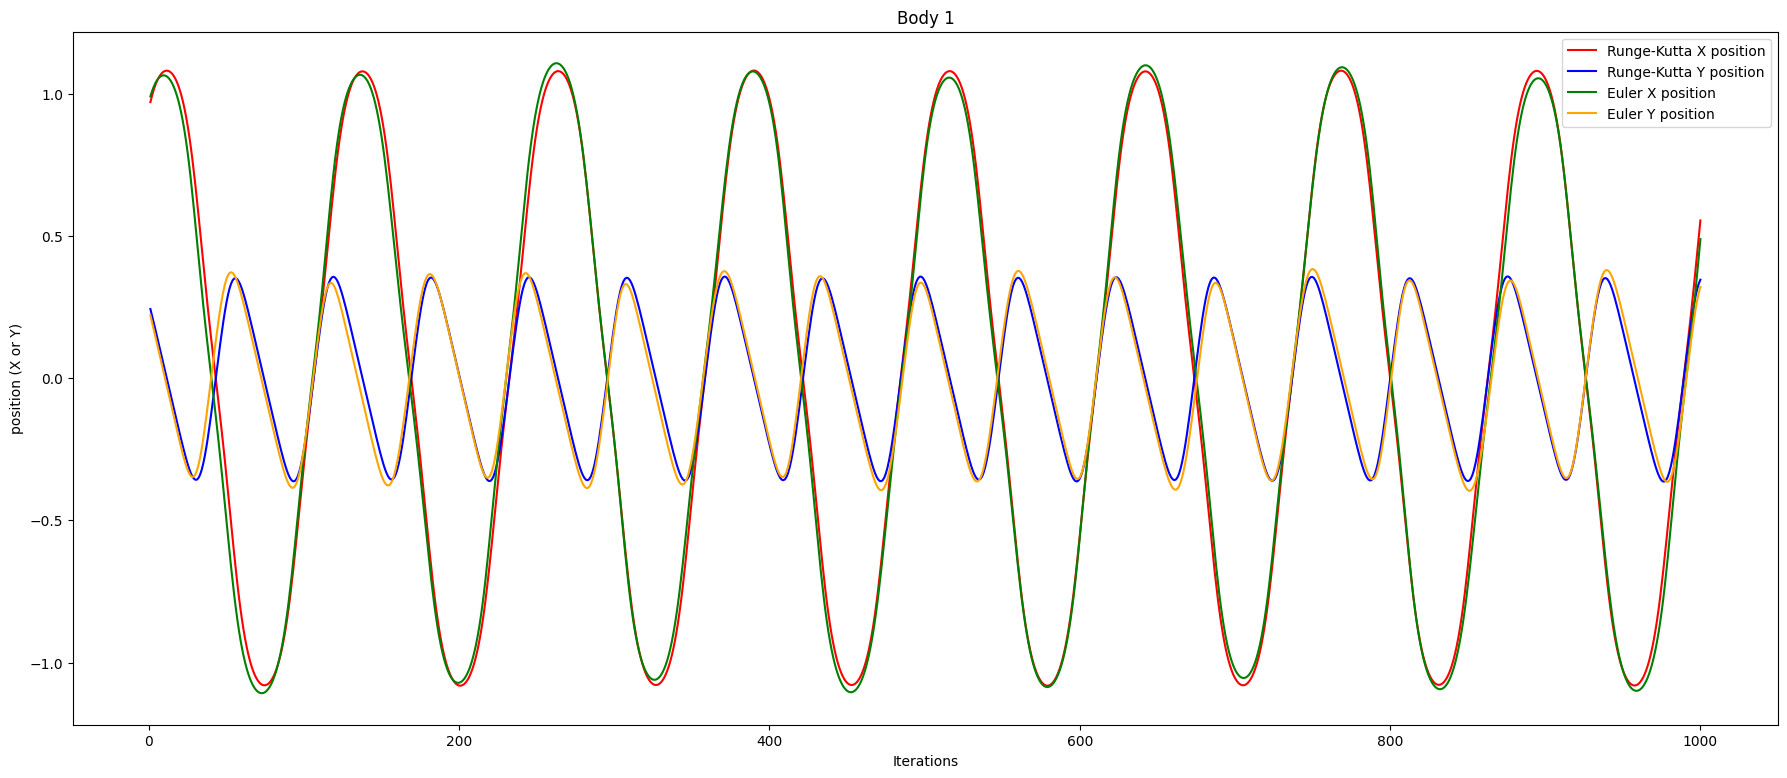

In [134]:

marker = np.linspace(1,1000,1000)
plt.figure(figsize=(22,9))
plt.plot(marker,rk1x, color = "r", label = "Runge-Kutta X position")
plt.plot(marker,rk1y, color = "b", label = "Runge-Kutta Y position")
plt.plot(marker,e1x, color = "g", label = "Euler X position")
plt.plot(marker,e1y, color = "orange", label = "Euler Y position")
plt.title("Body 1")
plt.xlabel("Iterations")
plt.ylabel("position (X or Y)")
plt.legend(loc = 1)

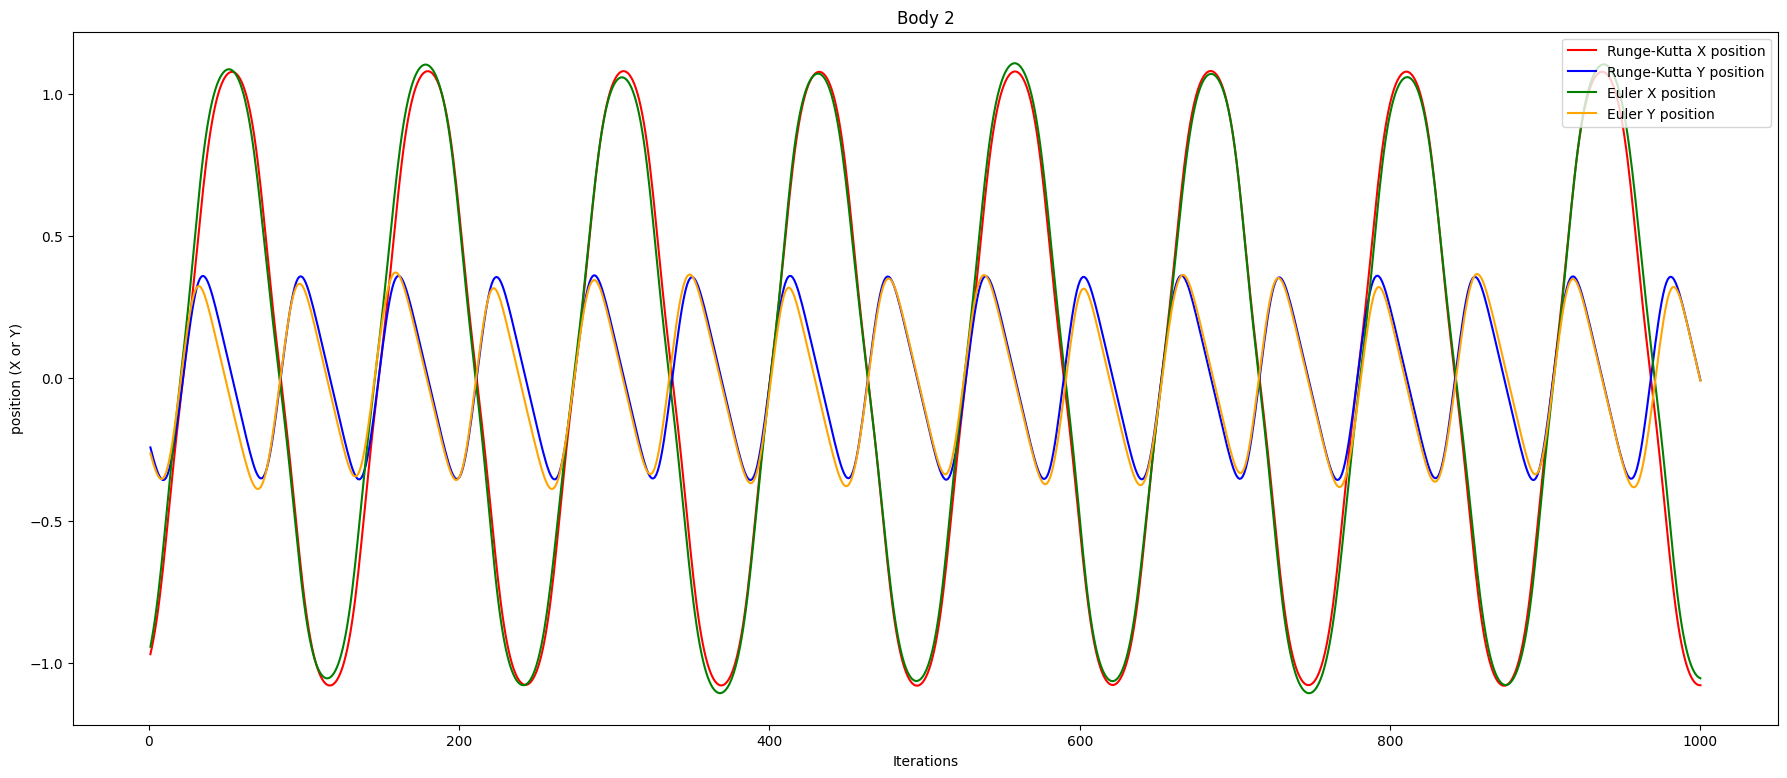

In [135]:
plt.figure(figsize=(22,9))
plt.plot(marker,rk2x, color = "r", label = "Runge-Kutta X position")
plt.plot(marker,rk2y, color = "b", label = "Runge-Kutta Y position")
plt.plot(marker,e2x, color = "g", label = "Euler X position")
plt.plot(marker,e2y, color = "orange", label = "Euler Y position")
plt.title("Body 2")
plt.xlabel("Iterations")
plt.ylabel("position (X or Y)")
plt.legend(loc = 1)

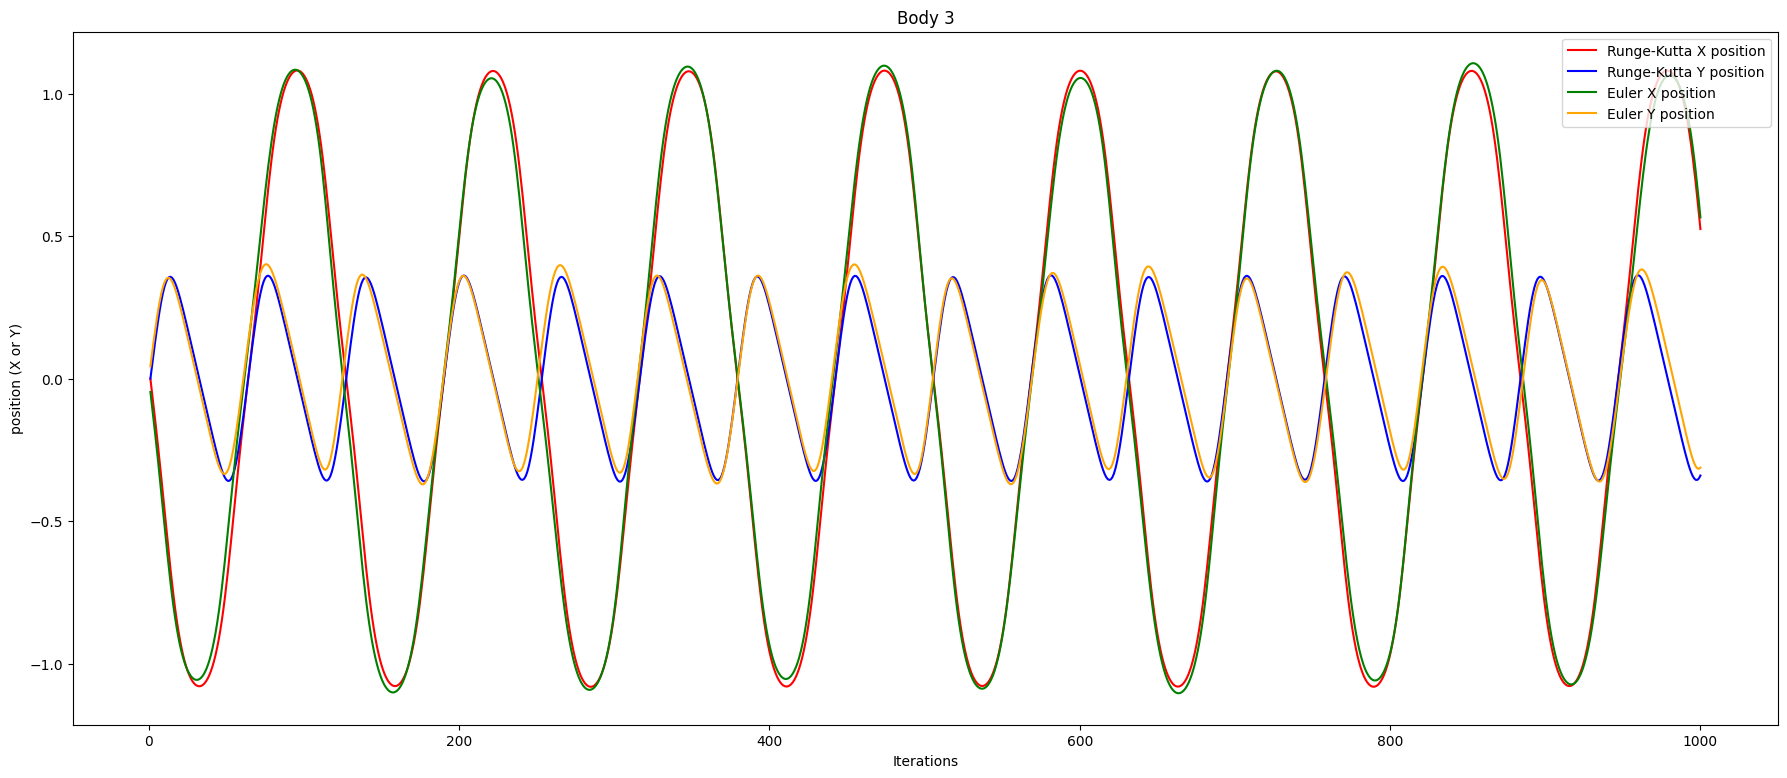

In [139]:
plt.figure(figsize=(22,9))
plt.plot(marker,rk3x, color = "r", label = "Runge-Kutta X position")
plt.plot(marker,rk3y, color = "b", label = "Runge-Kutta Y position")
plt.plot(marker,e3x, color = "g", label = "Euler X position")
plt.plot(marker,e3y, color = "orange", label = "Euler Y position")
plt.title("Body 3")
plt.xlabel("Iterations")
plt.ylabel("position (X or Y)")
plt.legend(loc = 1)

## Calculating the differences based on different Metrics

In [140]:
mae1 = np.mean(np.abs(df1))
mae2 = np.mean(np.abs(df2))
mae3 = np.mean(np.abs(df3))
# Mean squared error (MSE)
mse1 = np.mean(np.square(df1))
mse2 = np.mean(np.square(df2))
mse3 = np.mean(np.square(df3))

print("The Mean Absolute Error for each body is: Body1: {0}, Body2: {1}, and Body3: {2}".format(mae1,mae2,mae3))
print("The Mean Squared Error for each body is: Body1: {0}, Body2: {1}, and Body3: {2}".format(mse1,mse2,mse3))

The Mean Absolute Error for each body is: Body1: 0.036124706785535275, Body2: 0.03687687006370466, and Body3: 0.037821431620850055
The Mean Squared Error for each body is: Body1: 0.00215525546644612, Body2: 0.0023419919857842067, and Body3: 0.002283857002894242


In [141]:
cd1 = np.sum(np.linalg.norm(df1, axis=1))
cd2 = np.sum(np.linalg.norm(df2, axis=1))
cd3 = np.sum(np.linalg.norm(df3, axis=1))
print("Cumulative Euclidean Distance: Body1: {0}, Body2: {1}, and Body3: {2}".format(cd1,cd2,cd3))

Cumulative Euclidean Distance: Body1: 55.24064286030121, Body2: 57.404983319745085, and Body3: 57.25898894538102


In [142]:
from scipy.stats import pearsonr

# Correlation for x-coordinates
corr_x1, _ = pearsonr(e1[:, 0], rk1[:, 0])
corr_y1, _ = pearsonr(e1[:, 1], rk1[:, 1])

corr_x2, _ = pearsonr(e2[:, 0], rk2[:, 0])
corr_y2, _ = pearsonr(e2[:, 1], rk2[:, 1])

corr_x3, _ = pearsonr(e3[:, 0], rk3[:, 0])
corr_y3, _ = pearsonr(e3[:, 1], rk3[:, 1])


print("Correlation in x-coordinates: Body1: {0}, Body2: {1}, and Body3: {2}".format(corr_x1,corr_x2,corr_x3))
print("Correlation in y-coordinates: Body1: {0}, Body2: {1}, and Body3: {2}".format(corr_y1,corr_y2,corr_y3))

Correlation in x-coordinates: Body1: 0.9978104715020173, Body2: 0.9977764039043092, and Body3: 0.99785831683551
Correlation in y-coordinates: Body1: 0.9868849659115201, Body2: 0.9852333463581068, and Body3: 0.9866427618815099
